In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import Data_Cleaning as dc
from sklearn.linear_model import LinearRegression


from matplotlib import pyplot as plt
%matplotlib inline

Open basic raw csv, in the next code we will do some tricks about it

In [ ]:
df = pd.read_csv("all_sector_raw_2.csv")
df.shape

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

In [ ]:
df.corr()


Drop first outliers and merge columns

In [ ]:
count_both_conditions = ((df["Experience"] == 0) & (df["Position"] == 1)).sum()
print("Count where both conditions are met:", count_both_conditions)
df = df[~((df["Experience"] == 0) & (df["Position"] == 1))]
print(df.shape)
df.corr()

print((df["Experience"]==-1).sum())
count_both_conditions = ((df["Experience"] == -1) & (df["Position"] == 1)).sum()
print("Count where both conditions are met:", count_both_conditions)

df_copy = df.copy()
df_copy["Experience"] = df_copy["Experience"].replace(-1, 0)
print((df_copy["Experience"]==-1).sum())

print((df_copy["Experience"]==0).sum())
df_copy.corr()
# df_copy.to_csv("dataset_to_gpt.csv")

Drop second outliers

In [ ]:
df_copy = df_copy.drop(df_copy[df_copy["Experience"] == 9].index)
df_copy = df_copy.drop(df_copy[df_copy["Experience"] == 11].index)
df_copy.to_csv("dataset_without_exp9&11_0&1_unite.csv")
df_copy.corr()

Open csv after dropping outliers

In [9]:
df_without_first_outliers = pd.read_csv("dataset_without_exp9&11_0&1_unite.csv", index_col=0)
df_without_first_outliers.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_21488\1726834138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_without_first_outliers.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work Life Balance
Annual Salary,1.000000,0.179592,0.100136,0.033011,0.078078,0.153793,-0.077306,0.117182,0.110883,0.121584,0.095096,0.098132,0.082307
Experience,0.179592,1.000000,0.567598,0.566066,0.001945,0.044961,-0.061619,0.018291,0.007315,0.006814,0.003728,0.003488,0.007430
Education,0.100136,0.567598,1.000000,0.484928,0.001793,0.036418,-0.141729,-0.026728,0.001958,-0.011393,0.001927,0.006203,-0.000992
Position,0.033011,0.566066,0.484928,1.000000,0.021130,-0.005439,0.005787,0.064951,0.021861,0.030535,0.034571,0.022982,0.040194
Rating,0.078078,0.001945,0.001793,0.021130,1.000000,-0.094725,0.203819,0.430528,0.868181,0.858979,0.873514,0.865728,0.857505
Is Remote,0.153793,0.044961,0.036418,-0.005439,-0.094725,1.000000,-0.133367,-0.091213,-0.105478,-0.110535,-0.118511,-0.106738,-0.116020
Company Old,-0.077306,-0.061619,-0.141729,0.005787,0.203819,-0.133367,1.000000,0.416050,0.220599,0.217993,0.223439,0.182530,0.202559
Founded,0.117182,0.018291,-0.026728,0.064951,0.430528,-0.091213,0.416050,1.000000,0.502560,0.519219,0.499198,0.465895,0.468318
Career Opportunities,0.110883,0.007315,0.001958,0.021861,0.868181,-0.105478,0.220599,0.502560,1.000000,0.969246,0.977478,0.970032,0.943599
Comp & Benefits,0.121584,0.006814,-0.011393,0.030535,0.858979,-0.110535,0.217993,0.519219,0.969246,1.000000,0.966139,0.953497,0.948823


Doing one hot encoder on the dataframe

In [10]:
column = ['Job Title', 'Type of Ownership', 'Revenue', 'Company Size', 'Location','Sector']
df_copy_one_hot = df_without_first_outliers.copy()
df_copy_one_hot = dc.one_hot_encoding(df_copy_one_hot,column)
print(df_copy_one_hot.shape)

(1472, 1052)


In [11]:
df_copy_one_hot.corr()


C:\Users\agran\AppData\Local\Temp\ipykernel_21488\3748896751.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_one_hot.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Sector_Manufacturing,Sector_Media & Communication,Sector_Nonprofit & NGO,Sector_Personal Consumer Services,Sector_Pharmaceutical & Biotechnology,Sector_Real Estate,Sector_Restaurants & Food Service,Sector_Retail & Wholesale,Sector_Telecommunications,Sector_Transportation & Logistics
Annual Salary,1.000000,0.179592,0.100136,0.033011,0.078078,0.153793,-0.077306,0.117182,0.110883,0.121584,...,-0.132648,-0.051997,-0.046922,0.005556,0.009573,0.080449,-0.042776,-0.015511,0.053702,-0.005951
Experience,0.179592,1.000000,0.567598,0.566066,0.001945,0.044961,-0.061619,0.018291,0.007315,0.006814,...,-0.043546,0.014936,-0.010257,0.003330,0.044074,0.014112,-0.019896,-0.015133,-0.009852,-0.001582
Education,0.100136,0.567598,1.000000,0.484928,0.001793,0.036418,-0.141729,-0.026728,0.001958,-0.011393,...,-0.048466,0.046623,0.008611,-0.007198,0.003444,-0.002500,0.004962,0.013772,0.037598,0.048012
Position,0.033011,0.566066,0.484928,1.000000,0.021130,-0.005439,0.005787,0.064951,0.021861,0.030535,...,-0.023614,0.098690,0.026175,0.022254,0.034562,0.033211,0.008989,0.035744,0.036366,0.090634
Rating,0.078078,0.001945,0.001793,0.021130,1.000000,-0.094725,0.203819,0.430528,0.868181,0.858979,...,0.073173,0.038573,0.005012,-0.002880,0.060711,0.016746,0.002888,0.006074,-0.029070,0.035227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sector_Real Estate,0.080449,0.014112,-0.002500,0.033211,0.016746,0.143352,-0.011747,0.052760,0.019310,0.025370,...,-0.035690,-0.012516,-0.006806,-0.003201,-0.015758,1.000000,-0.003921,-0.012083,-0.007867,-0.007529
Sector_Restaurants & Food Service,-0.042776,-0.019896,0.004962,0.008989,0.002888,-0.013766,0.007188,0.026616,-0.003133,-0.007279,...,-0.018588,-0.006518,-0.003544,-0.001667,-0.008207,-0.003921,1.000000,-0.006293,-0.004097,-0.003921
Sector_Retail & Wholesale,-0.015511,-0.015133,0.013772,0.035744,0.006074,-0.024579,0.028214,0.081620,0.007702,0.013557,...,-0.057276,-0.020085,-0.010922,-0.005136,-0.025289,-0.012083,-0.006293,1.000000,-0.012624,-0.012083
Sector_Telecommunications,0.053702,-0.009852,0.037598,0.036366,-0.029070,-0.000516,0.043428,0.051516,0.000043,0.004504,...,-0.037290,-0.013077,-0.007111,-0.003344,-0.016465,-0.007867,-0.004097,-0.012624,1.000000,-0.007867


<AxesSubplot:ylabel='Location_ CA'>

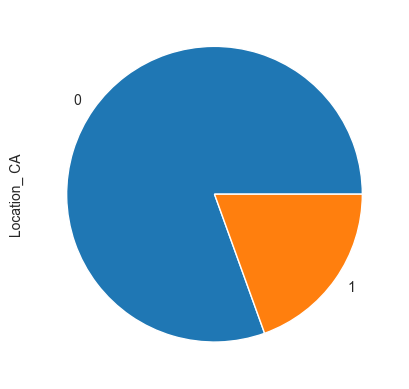

In [12]:
df_copy_one_hot['Location_ CA'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Experience'>

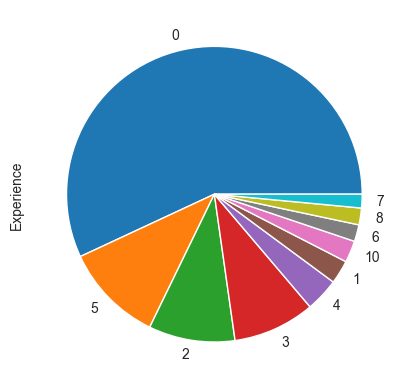

In [13]:
df_copy_one_hot['Experience'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Is Remote'>

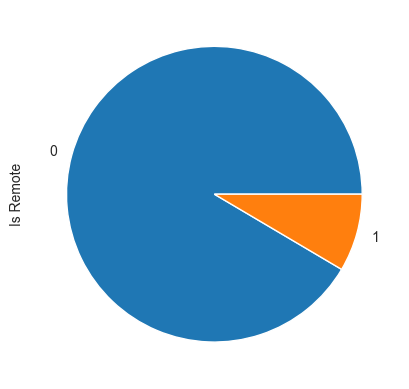

In [14]:
df_copy_one_hot['Is Remote'].value_counts().plot(kind='pie')

<AxesSubplot:>

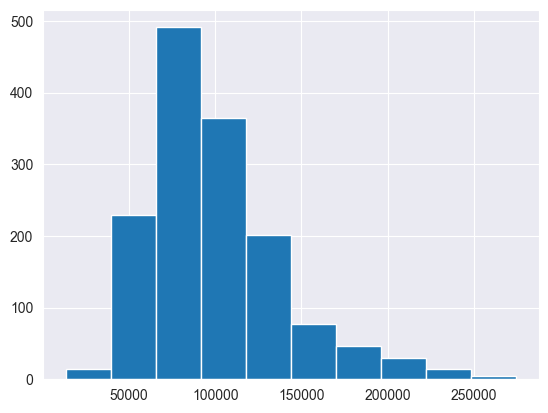

In [15]:
df_copy_one_hot['Annual Salary'].hist()

<AxesSubplot:>

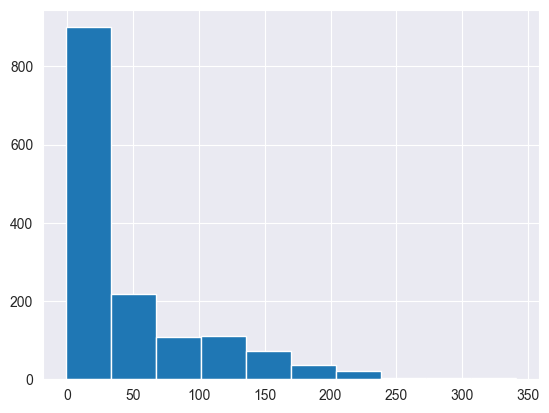

In [16]:
df_copy_one_hot['Company Old'].hist()

<AxesSubplot:>

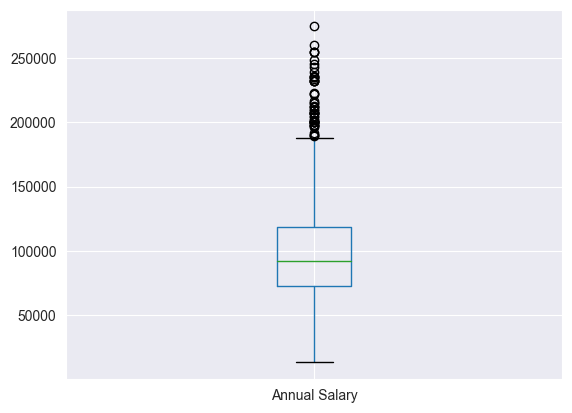

In [17]:
df_copy_one_hot.boxplot(column=[ 'Annual Salary'])

<BarContainer object of 1472 artists>

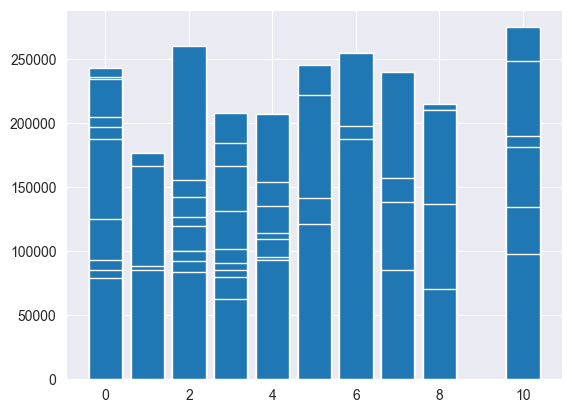

In [18]:
plt.bar(df_copy_one_hot['Experience'], df_copy_one_hot['Annual Salary'])


In [ ]:
plt.bar(df['Position'], df['Experience'])


<AxesSubplot:xlabel='Experience', ylabel='Annual Salary'>

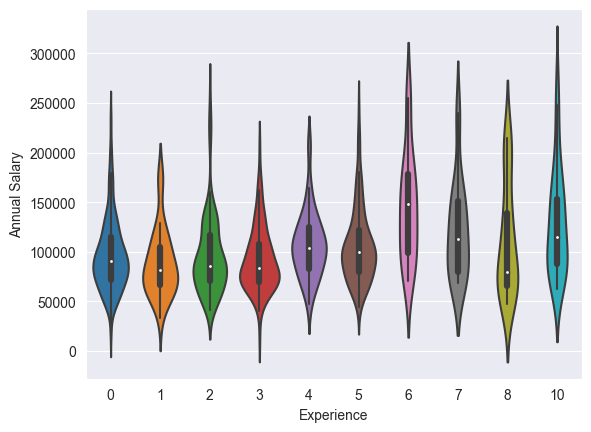

In [19]:
# sns.violinplot(x='Annual Salary', y='Experience', data=df_copy)
sns.violinplot(x='Experience', y='Annual Salary', data=df_without_first_outliers)


Removing outliers

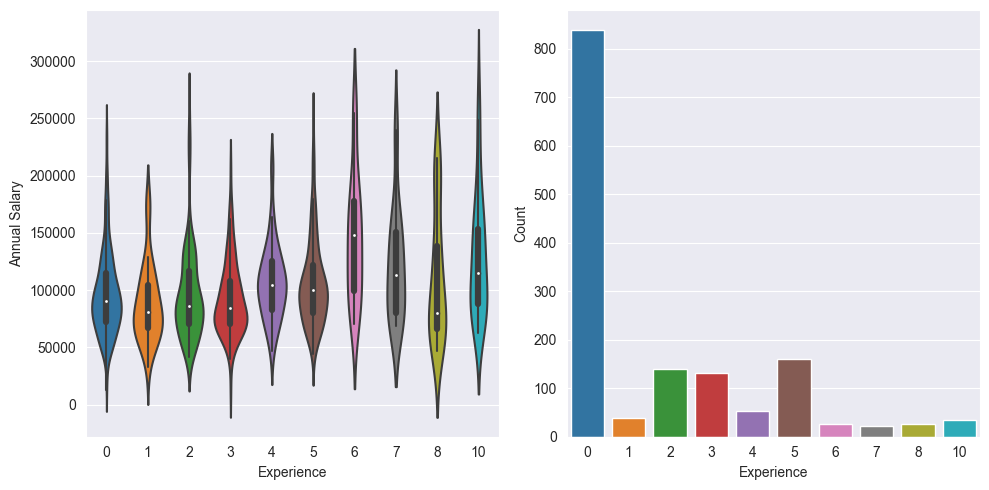

Exp = 2 and Salary > 190k 0.04316546762589928
6
Exp = 0 and Salary > 190k 0.14388489208633093
20
Exp = 3 and Salary > 190k 0.007194244604316547
1


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Violin plot
sns.violinplot(x='Experience', y='Annual Salary', data=df_copy_one_hot, ax=ax1)

# Count plot for Parameter1
sns.countplot(x='Experience', data=df_copy_one_hot, ax=ax2)
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()
print("Exp = 2 and Salary > 190k", (((df_copy_one_hot["Experience"] == 2) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())/(df_copy_one_hot["Experience"] == 2).sum())
print(((df_copy_one_hot["Experience"] == 2) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())

print("Exp = 0 and Salary > 190k", (((df_copy_one_hot["Experience"] == 0) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())/(df_copy_one_hot["Experience"] == 2).sum())
print(((df_copy_one_hot["Experience"] == 0) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())

print("Exp = 3 and Salary > 190k", (((df_copy_one_hot["Experience"] == 3) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())/(df_copy_one_hot["Experience"] == 2).sum())
print(((df_copy_one_hot["Experience"] == 3) & (df_copy_one_hot["Annual Salary"] > 190000)).sum())


In [67]:
df_copy_one_hot = df_copy_one_hot.drop(df_copy_one_hot[(df_copy_one_hot["Experience"] == 0) & (df_copy_one_hot["Annual Salary"] > 190000)].index)

df_copy_one_hot = df_copy_one_hot.drop(df_copy_one_hot[(df_copy_one_hot["Experience"] == 2) & (df_copy_one_hot["Annual Salary"] > 190000)].index)

df_copy_one_hot = df_copy_one_hot.drop(df_copy_one_hot[(df_copy_one_hot["Experience"] == 3) & (df_copy_one_hot["Annual Salary"] > 190000)].index)



df_copy_one_hot.shape

(1445, 1052)

<AxesSubplot:xlabel='Experience', ylabel='Annual Salary'>

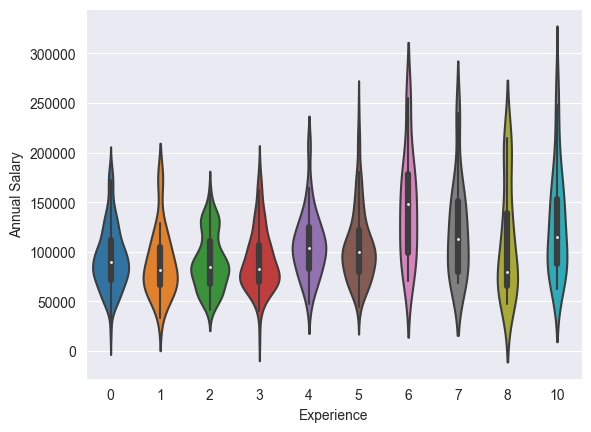

In [23]:
sns.violinplot(x='Experience', y='Annual Salary', data=df_copy_one_hot)


In [25]:
df_copy_one_hot.corr()

C:\Users\agran\AppData\Local\Temp\ipykernel_21488\1179407274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_one_hot.corr()


,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Sector_Manufacturing,Sector_Media & Communication,Sector_Nonprofit & NGO,Sector_Personal Consumer Services,Sector_Pharmaceutical & Biotechnology,Sector_Real Estate,Sector_Restaurants & Food Service,Sector_Retail & Wholesale,Sector_Telecommunications,Sector_Transportation & Logistics
Annual Salary,1.000000,0.226515,0.112440,0.049845,0.085479,0.143512,-0.080261,0.111578,0.104637,0.116025,...,-0.126557,-0.071431,-0.046709,0.008358,0.021637,0.017198,-0.044192,-0.008502,0.017240,-0.001219
Experience,0.226515,1.000000,0.572565,0.566196,0.002636,0.054078,-0.063227,0.019374,0.008830,0.009015,...,-0.046215,0.013512,-0.011007,0.003007,0.042594,0.035548,-0.020378,-0.016454,-0.013074,-0.002376
Education,0.112440,0.572565,1.000000,0.485206,0.002701,0.047661,-0.146311,-0.029789,-0.002660,-0.013411,...,-0.047447,0.039996,0.008714,-0.007333,0.003412,0.028259,0.005021,0.013931,0.014315,0.048757
Position,0.049845,0.566196,0.485206,1.000000,0.020143,0.002188,0.005571,0.064745,0.020949,0.031269,...,-0.024621,0.103449,0.026002,0.022247,0.033975,0.055883,0.008843,0.035361,0.029665,0.090909
Rating,0.085479,0.002636,0.002701,0.020143,1.000000,-0.101546,0.209763,0.432188,0.871140,0.862546,...,0.073150,0.037105,0.005045,-0.002906,0.061187,0.012028,0.002907,0.006111,-0.006516,0.035496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sector_Real Estate,0.017198,0.035548,0.028259,0.055883,0.012028,0.113357,-0.001094,0.045022,0.017251,0.017120,...,-0.030939,-0.010678,-0.005907,-0.002778,-0.013681,1.000000,-0.003403,-0.010488,-0.006229,-0.006535
Sector_Restaurants & Food Service,-0.044192,-0.020378,0.005021,0.008843,0.002907,-0.013664,0.007213,0.027013,-0.002924,-0.007080,...,-0.018913,-0.006527,-0.003611,-0.001698,-0.008363,-0.003403,1.000000,-0.006412,-0.003808,-0.003995
Sector_Retail & Wholesale,-0.008502,-0.016454,0.013931,0.035361,0.006111,-0.023849,0.028354,0.082856,0.008431,0.014346,...,-0.058288,-0.020117,-0.011129,-0.005233,-0.025774,-0.010488,-0.006412,1.000000,-0.011735,-0.012312
Sector_Telecommunications,0.017240,-0.013074,0.014315,0.029665,-0.006516,0.005359,0.016763,0.049209,-0.003031,-0.002449,...,-0.034615,-0.011947,-0.006609,-0.003108,-0.015306,-0.006229,-0.003808,-0.011735,1.000000,-0.007311


<AxesSubplot:>

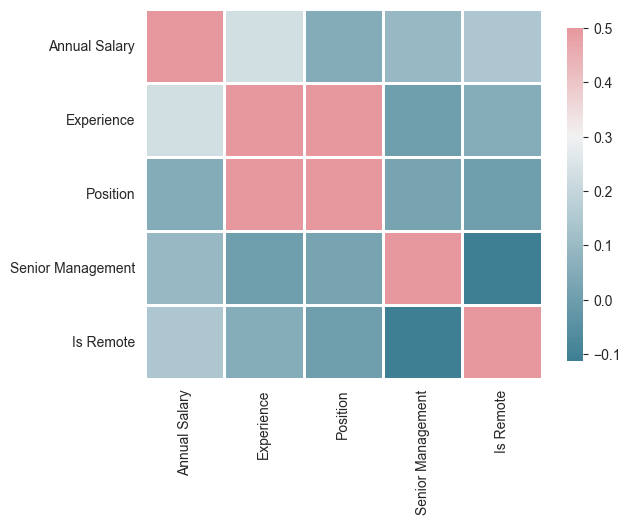

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
data = df_copy_one_hot[['Annual Salary', 'Experience', 'Position', 'Senior Management', 'Is Remote']].corr()
sns.heatmap(data, vmax=.5, center=0.3, cmap=cmap,square=False, linewidths=0.9, cbar_kws={'shrink':.9}, annot=False)

Remoing non numerics columns

In [28]:
print(df_copy_one_hot.shape)
df_copy_numeric = df_copy_one_hot.select_dtypes(include='number')
print(df_copy_numeric.shape)

(1445, 1052)
(1445, 1048)


Trying SVR model

In [34]:
# Import the necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load and preprocess the dataset
# Assuming your dataset is stored in 'X' as the input features and 'y' as the target variable
# Perform train-test split
# X = df_copy[["Experience","Education",'Position']]
X = df_copy_numeric.drop('Annual Salary', axis=1)
y = df_copy_numeric["Annual Salary"]
# y = df_copy["Education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear', C=10.0, epsilon=0.7)  # Adjust kernel and hyperparameters as needed
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can further optimize the model by tuning hyperparameters or using cross-validation
# For example, you can perform a grid search to find the best hyperparameters

# Import GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.5]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5)

# Perform grid search to find the best model
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model from grid search
best_svr = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_svr.predict(X_test_scaled)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error:", mse_best)



# Assuming y_true contains the actual target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1125254128.126669
Best Model Mean Squared Error: 1125254914.3531237
R-squared: 0.20606474392972352


Trying LR model

In [35]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)
print("R2: ",regressor.score(X_train,y_train))

R2:  0.9562373244557724


Open seconds csv for checking model

In [36]:

new_data = pd.read_csv('dataBase raw game development.csv')
new_data = new_data.loc[:, ~new_data.columns.str.contains('^Unnamed')]
new_data = new_data.loc[:, ~new_data.columns.str.contains('^Time of Scrape')]
new_data.drop_duplicates(inplace=True)
new_data.shape

(1733, 23)

In [37]:
column = ['Job Title', 'Type of Ownership', 'Revenue', 'Company Size', 'Location','Sector']

new_data_copy = new_data.copy()
new_data_copy_one_hot_encoder = dc.one_hot_encoding(new_data_copy,column)
print(new_data_copy_one_hot_encoder.shape)
new_data_copy_numeric = new_data_copy_one_hot_encoder.select_dtypes(include='number')
print(new_data_copy_numeric.shape)

(1733, 1393)
(1733, 1389)


Check missing columns between the two dataframes

In [39]:
# missing_columns = set(new_data_copy_numeric.columns) - set(df_copy_numeric.columns)
# print(missing_columns)
missing_columns = ['Job Title_Animation Tools and Pipeline Programmer', 'Job Title_Game Artist', 'Job Title_Senior Audio Programmer', 'Job Title_Lead Technical UI Designer', 'Job Title_LEAD ENVIRONMENT ARTIST', 'Job Title_VFX Artist (Retro Studios)', 'Job Title_Studio 3D Designer', 'Job Title_Character Technical Artist', 'Job Title_Machine Learning Engineer - Computer Vision and Geospatial Analytics', 'Job Title_Sr. GUI Designer', 'Job Title_3D Rendering Artist For One of A Kind Mixed Use Commercial Project!', 'Job Title_Android Software Engineer (Remote)', 'Job Title_3D Artist - Characters', 'Job Title_Junior Simulation Engineer', 'Job Title_Sr. Email Developer', 'Job Title_ENGINEERING MODELER IN CONSTRUCTION', 'Job Title_Radar Systems Engineer', 'Job Title_ROBLOX- Gameplay Programmer', 'Job Title_Shading Tech Artist, Avatars', 'Job Title_SENIOR ORACLE DATABASE CONSULTANT DEVELOPER', 'Job Title_Software Engineer (Java)', 'Job Title_Web Designers/Programmers/ Developers', 'Job Title_Senior Game Designer - Remote Opportunity', 'Job Title_Social Media Producer', 'Job Title_Full Stack Software Engineer', 'Job Title_Digital Content Producer', 'Job Title_Rotorcraft Vehicle Simulation Software Engineer (Entry or Associate Level)', 'Job Title_Senior Unity Engineer - VR Showcase, PICO', 'Job Title_Level Designer (Unannounced AAA Game)', 'Job Title_Research Scientist, Applied 3D Computer Vision and Machine Learning (PhD)', 'Job Title_Software Developer - Entry level', 'Job Title_Adjunct faculty- Game Design', 'Job Title_UI Artist - Game Development', 'Job Title_Senior Technical Animator / Character TD', 'Job Title_AI Research Engineer', 'Location_Scottsdale, AZ', 'Job Title_Lead UI/UX Designer - Consumer Web Applications and Games', 'Job Title_Lead Gameplay Engineer (Combat)', 'Job Title_3D Coordinator/Modeler', 'Job Title_Principal Product Designer', 'Job Title_Expert Environment Artist', 'Job Title_Graphic Designer - Presentations', 'Job Title_Sr Combat Designer (Companions)', 'Job Title_Previs - Modeler', 'Job Title_Senior Software Engineer (VR Full Stack)', 'Job Title_(USA) Designer Lead , Industrial Design', 'Job Title_Game Developer', 'Job Title_Tools Programmer', 'Job Title_Software Engineer II - Full Stack', 'Job Title_C++ Software Engineer IV', 'Job Title_Entertainment Graphic Designer, Sr.', 'Job Title_Level Artist', 'Job Title_3D Motion Graphics Designer', 'Job Title_Test/Systems Engineer', 'Job Title_Front End Web Design Coordinator - Remote', 'Job Title_Associate Producer - Contract', 'Job Title_Game Artist III', 'Job Title_Senior Industrial Designer, Design Development', 'Job Title_Content Video Editor / Producer', 'Job Title_Model 2023', 'Job Title_Video Game Design Instructor', 'Job Title_Gameplay Programmer: Ambient Population (All Levels)', 'Job Title_Senior Worldbuilding Environment Artist', 'Job Title_Software Engineer - (Unity)', 'Job Title_Principal Software Engineer, Graphics', 'Job Title_Senior Technical Artist - Procedural (Star Wars FPS)', 'Job Title_Programmer', 'Job Title_Remote Software Engineer - All Levels', 'Location_San Francisco, CA', 'Job Title_Software Engineer (REMOTE OPPORTUNITY)', 'Job Title_Senior Graphics Programmer [New IP]', 'Job Title_Audio/Video Developer/Producer', 'Job Title_Texture Artist', 'Job Title_Senior Game Designer - AAA Game Development', 'Job Title_Brand Designer, Social', 'Job Title_Senior External Producer', 'Job Title_Quantitative Software Developer', 'Job Title_Teaching Artist with a Passion for Environmental Science', 'Job Title_Web Application Developer', 'Job Title_Lead Technical Animator', 'Job Title_Computer Vision and Deep Learning Research Engineer', 'Job Title_Sanzaru Technical Games Producer', 'Job Title_Associate Space Communications Systems Engineer', 'Job Title_Principal Game Designer', 'Job Title_Product Owner/Producer - Battlefield Central Tech', 'Job Title_STRUCTURAL DRAFTER/BIM MODELER', 'Job Title_Applied Computer Vision Engineer', 'Job Title_Lead Software Engineer - Graphics', 'Job Title_Gameplay Programmer', 'Job Title_Senior Technical Lighting Artist', 'Job Title_Technical Designer - Diablo IV | Albany, NY or Irvine, CA', 'Job Title_vr Tech artist', 'Job Title_UX Designer', 'Job Title_Senior Technical Animator/Rigging 1 - VR', 'Job Title_Mid-Level Simulation Software Engineer', 'Job Title_QA Lead', 'Job Title_Engineer II, Systems', 'Job Title_UI Artist', 'Job Title_Web Designer / Developer', 'Job Title_Software Engineer, Core Technology', 'Job Title_Staff Quality Assurance Specialist', 'Job Title_Rendering Programmer', 'Location_Chantilly, VA', 'Job Title_Sr Technical Narrative Designer', 'Job Title_Senior 3D Character Artist - Diablo IV | Albany, NY or Irvine, CA', 'Job Title_Associate Systems Designer', 'Job Title_Mission Designer', 'Job Title_Security Engineer', 'Job Title_UNITY SERIOUS GAMES/SIMULATION DESIGNER', 'Job Title_Email Developer', 'Job Title_Machine Learning Scientist', 'Job Title_Quality Assurance / Game Tester (English)', 'Job Title_Database/Application Developer I (Full -time) Information Tech', 'Job Title_Creative Coder', 'Job Title_Coordinator, Video Production', 'Job Title_NOC Engineer', 'Job Title_Geospecific Modeler', 'Job Title_3D Software Rendering Graphics Designer I', 'Job Title_Technical Artist (Video Games) *HIRING ARTISTS NOW* REMOTE', 'Job Title_BIM Modeler', 'Job Title_Digital Graphic Designer/Email Developer', 'Job Title_Breach and Attack Simulation Engineer', 'Job Title_Art and Visual Communication Coordinator/ Faculty (ARTC, ARTV, IMED, PHTC)', 'Job Title_Node.js Developer', 'Job Title_Senior Software Engineer (Full-stack)', 'Job Title_Environment Artist', 'Job Title_Senior Software Engineer, Gameplay (Anti-Cheat) - Overwatch (Relocation Assistance Available)', 'Job Title_Senior Technical Designer', 'Job Title_Lead Concept Artist - VR', 'Job Title_Lead Technical Artist (Environments)', 'Job Title_Senior Technical Animator', 'Job Title_VR Unity 3D Application Developer', 'Job Title_Creative Coordinator, Game Presentation & Fan Experience (TEMP)', 'Job Title_Director of Software Engineering (On-site & Fulltime)', 'Job Title_Marketing Graphic Designer', 'Job Title_Motion Graphics Specialist', 'Job Title_UX Designer -128465', 'Job Title_Social Video Producer (Full-Time Position)', 'Job Title_Systems Simulation Engineer', 'Job Title_UI Designer / 2D Artist', 'Job Title_3D Artist (broadcast)', 'Job Title_Lead Environment Concept Artist', 'Job Title_Digital Video Producer', 'Job Title_Senior Gameplay API Engineer', 'Job Title_Lead Dungeon Designer - Diablo IV | Albany, NY or Irvine, CA', 'Job Title_Associate Creative Director', 'Job Title_Test Manager, Diablo IV', 'Job Title_Jr Graphic Designer', 'Job Title_Creative Director - Madden', 'Job Title_Associate Producer, Game Production', 'Job Title_Associate Producer', 'Location_Boxborough, MA', 'Job Title_Junior Frontend Web Developer', 'Job Title_Senior Weapon / Prop Artist', 'Job Title_Expert Game Designer', 'Job Title_Associate Concept Artist', 'Job Title_Adjunct Faculty, Game Design (Digital Games)', 'Job Title_Unity 3D Game Developer', 'Location_Chandler, AZ', 'Location_Chicago, IL', 'Job Title_Studio Operations Manager', 'Job Title_3D Artist', 'Job Title_Presentation Designer', 'Job Title_Verification Engineer - New College Grad 2023', 'Job Title_Art & Design: Games and Playable Media Program Lecturer Pool', 'Job Title_Exhibition Technical Engineer', 'Job Title_Sr. MMO Game Developer (BHJOB20048_365)', 'Location_Atlanta, GA', 'Job Title_Localization Product Specialist (Bilingual Japanese)', 'Job Title_Front End Developer', 'Job Title_Senior Concept Artist', 'Job Title_Uncapped Games - VFX Artist (All Levels)', 'Job Title_Junior Software Engineer', 'Job Title_Construction CAD Designer / Project Engineer - Junior', 'Job Title_Design Engineer', 'Job Title_Junior Detailer/Modeler', 'Job Title_Game Engineer', 'Job Title_Producer, Art Outsource', 'Job Title_Senior Character Concept Artist', 'Job Title_Graphics Software Engineer - Rendering', 'Job Title_VR/AR Software Engineer', 'Job Title_Software Engineer IV / Game Engine Specialist', 'Job Title_Encounter Designer', 'Job Title_Character Rigger', 'Job Title_Graphic Designer Entry Level', 'Job Title_Senior Product Manager', 'Job Title_Producer, Digital', 'Job Title_Junior 3D Artist [mobile video games]', 'Location_Athens, OH', 'Job Title_Senior Software Engineer, Oracle Fusion', 'Job Title_Architectural Revit Modeler', 'Location_Charleston, SC', 'Job Title_Software Engineer III', 'Job Title_Application Engineer Modeling & Simulation', 'Job Title_FAIRFIELD TEEN THEATRE STAFF', 'Job Title_BIM Modeler I', 'Job Title_Senior Software Engineer - 3D Graphics & Display', 'Job Title_Senior Full-Stack VR Developer', 'Job Title_Software Engineer, Front End', 'Job Title_Rigging Technical Artist - Contract', 'Job Title_SQL Developer', 'Job Title_Executive Producer (Games)', 'Job Title_Lead Audio Engineer', 'Job Title_Lighting Artist', 'Location_Nashville, TN', 'Job Title_Video Producer/Content Creator', 'Job Title_Software Engineer, Knowledge Graph Pipeline', 'Job Title_Data Developer IV - Remote', 'Job Title_UE Gameplay Programmer', 'Job Title_Associate - Data Engineer', 'Job Title_Video Production Specialist', 'Job Title_Simulation Engineer', 'Job Title_Senior Concept Artist (Cinematic Illustrator)', 'Job Title_Graphic Designer', 'Job Title_Associate Technical Director', 'Job Title_Roblox Game Programmer - Freelance', 'Job Title_ENGINEERING TEST TECHNICIAN', 'Job Title_Senior Texture Artist', 'Job Title_Systems Engineer II', 'Job Title_Uncapped Games - 3D Artist (All Levels)', 'Job Title_Subsurface Geologic Modeler', 'Job Title_Lead Game Developer (Unreal Engine)', 'Job Title_Energy Modeler/Energy Engineer - NYC or DC', 'Job Title_Designer (Board Games)', 'Job Title_New Media Designer (Temporary)', 'Job Title_Senior Software Engineer, Gameplay - VR', 'Job Title_Coastal Modeler - Kiewit Infrastructure Engineer', 'Job Title_C++ Software Engineer - 3D Printing Graphics and Visualization', 'Job Title_Entry-Level Radar and CID Systems Engineer', 'Job Title_Visiting Assistant Professor - Video Game Writer / Narrative Designer', 'Job Title_Social Media Content Producer', 'Job Title_Lead Technical Artist (Unreal Engine 5)', 'Job Title_Senior UX/UI Designer - Contract', 'Job Title_Game Engineer - Full Time - Multiple Levels', 'Job Title_Lead Technical Designer', 'Job Title_UI/UX Technical Designer', 'Job Title_Operations - Talent Community', 'Job Title_Web Developer/Designer', 'Location_South Carolina', 'Job Title_BIM Revit Modeler II', 'Job Title_Senior Android Engineer', 'Job Title_Jr. Python Developer', 'Job Title_Staff Software Engineer', 'Job Title_Senior/Staff Technical Artist', 'Job Title_Software Engineer, Gameplay - Reality Labs', 'Job Title_Staff Fullstack Software Engineer', 'Job Title_Visual Effects Artist (Games)', 'Job Title_Software Engineer, Gameplay', 'Job Title_Senior VFX Artist - Remote or On Site', 'Job Title_Senior Software Engineer (Fed)', 'Job Title_3D MODELER/STEEL DETAILER', 'Job Title_Executive Producer - Casual Game Studio', 'Job Title_HTML5 Game/Animation Developer', 'Job Title_Golden Artist Colors - Marketing Production Support', 'Job Title_Game UI Designer - Full Time and Freelance', 'Job Title_Unity Game Programmer, TRADOC G-2', 'Job Title_UX Designer (Apex Legends)', 'Location_Apalachin, NY', 'Job Title_Product Designer (Mid-Level Contract-to-hire)', 'Job Title_Front End Software Engineer', 'Job Title_Software Engineer, UI Automation (Infotainment)', 'Job Title_Junior Video Producer', 'Job Title_Senior 3D Animator II', 'Job Title_Engineer II, R&D', 'Job Title_Designer (NST)', 'Job Title_Senior Audio Artist I', 'Job Title_AR 3D Tech Artist, Sr.', 'Job Title_Frontend Software Engineer - React', 'Job Title_Junior Test Engineer (BID)', 'Job Title_Computer Vision Engineer/Software Engineer', 'Job Title_Staff Frontend Engineer', 'Job Title_Gameplay Software Engineer (Games)', 'Job Title_Senior Gameplay Designer', 'Job Title_Technical PD 3D Artist', 'Job Title_Entry Level Software Developer', 'Job Title_AI Programmer', 'Job Title_Unity Gameplay Programmer (Staff/Senior)', 'Job Title_Lead Lighting Artist', 'Job Title_VYPE Live. Producer/Play By Play', 'Job Title_Food & Beverage Team Member (Part-Time)', 'Job Title_CG Generalist', 'Job Title_Retail Associate, Omega Mart (Summer Seasonal)', 'Job Title_Email Designer/Developer - REMOTE', 'Job Title_Senior Environment Artist - Unannounced Survival Game', 'Job Title_Freelance Web Developer', 'Job Title_Email Designer & Front-End Developer (Remote)', 'Job Title_Illustrator', 'Job Title_AI Combat Designer', 'Job Title_Lead Game Designer - Modes (Apex Legends)', 'Job Title_Electrical Senior Designer and E3D Modeler', 'Job Title_VP of Creative Operations', 'Job Title_Social Media Producer (Part-time)', 'Job Title_School of Game, Part-Time Instructor', 'Job Title_Game Designer on Horizon Worlds', 'Job Title_UX Design Lead', 'Job Title_Gameplay Programmer - Twisted Pixel Games', 'Location_Andover, MA', 'Location_Reno, NV', 'Job Title_UX Designer/Developer Consultant', 'Job Title_Research Scientist, Computer Vision', 'Job Title_Front-End Web Developer/Designer', 'Job Title_Unreal Engine / C++ Engineer', 'Job Title_Penetration Tester I', 'Job Title_Splunk Admin/Developer', 'Job Title_Associate Social Media Producer/Editor, OutKick', 'Job Title_Principal Engineer – Software Development (Desktop Graphics)', 'Job Title_SR WEB DEVELOPER - INSTITUTIONAL ADVANCEMENT', 'Job Title_Game UI/UX Designer', 'Job Title_Broadcaster & Digital Content Producer, SDG', 'Job Title_Software Developer Level II', 'Job Title_Technical Artist - Remote or On Site', 'Job Title_Unity Developer', 'Job Title_Staff Quality Assurance Specialist 2', 'Job Title_Senior Character Artist - Sanzaru', 'Job Title_Senior Network Gameplay Programmer', 'Job Title_Software Development Engineer in Test- Intelligent Creation', 'Job Title_Associate Content Operations Specialist (1-year Contract) | Irvine, CA', 'Job Title_FX Artist', 'Job Title_Application Engineer I', 'Job Title_3D Computer Vision and Perception Engineer in Mapping', 'Job Title_Engine Tools Programmer', 'Job Title_RF System Engineer, Entry Level', 'Job Title_Technical aRTIST (JR/MID)', 'Location_Columbia, TN', 'Job Title_Game Automation Engineer - The Sims', 'Job Title_Process Engineer I', 'Job Title_Senior Experiential Producer', 'Job Title_Senior Technical Artist (Environment)', 'Job Title_Senior / Principal Sound Designer', 'Job Title_Senior Video Engineer Mobile, TikTok Mobile Experience', 'Job Title_Architectural Visualization Designer- Bay Area Infrastructure', 'Job Title_Audio Visual Design Engineer', 'Job Title_Interactive Web Designer/Developer', 'Job Title_Junior/Mid Level Software Engineer - Deseret News', 'Job Title_Senior 3D Animator / Artist', 'Job Title_Associate Game Programmer (C++)', 'Job Title_Consultant- UX Designer', 'Job Title_Graphic Artist, CNN (Temporary)', 'Job Title_Full-Time EDP Systems Analyst III: Programmer/Analyst', 'Job Title_Website Designer/Developer', 'Job Title_Application Developer I', 'Job Title_Game Server Engineer', 'Job Title_Senior Rigging & Simulation Artist II (Temp)', 'Job Title_Senior Game Programmer', 'Job Title_Lead Character Artist - Remote or On Site', 'Job Title_UI/UX and Web Developer', 'Location_Gold Coast', 'Job Title_Video Content Producer, Basketball Operations', 'Job Title_Level Artist (Unreal)', 'Job Title_Senior Software Engineer, Computer Vision', 'Location_Dallas, TX', 'Location_Tampa, FL', 'Job Title_Editor', 'Job Title_Sr. Lighting Artist', 'Job Title_Staff Product Designer', 'Job Title_Senior Unity Game Programmer', 'Job Title_ETL Developer', 'Job Title_Senior Product Designer (Contract-to-hire)', 'Job Title_Thermal Simulation Engineer', 'Job Title_Python Developer', 'Job Title_Senior Technical Designer - Unannounced Survival Game', 'Job Title_Senior 3D Artist, Gov Tech', 'Job Title_2D Artist', 'Location_Pullman, WA', 'Job Title_Lead Level Designer (Apex Legends)', 'Job Title_Electrical Designer/Modeler', 'Job Title_Lead Game Producer', 'Job Title_3D Graphic Designer', 'Job Title_Digital Media Senior Director (eRetail/Retail Media Network)', 'Job Title_Salesforce Developer', 'Job Title_Senior Motion Graphics Designer/Animator', 'Job Title_AI Programmer (all levels)', 'Job Title_Senior Technical Designer - VR', 'Job Title_Database Engineer', 'Job Title_junior vr programmer', 'Job Title_Software Developer, Frontend', 'Job Title_Design | CG Artist', 'Job Title_Senior Gameplay Programmer - Remote or On Site', 'Job Title_Lead Level Designer', 'Job Title_Audio-Visual and Multimedia Specialist (All Levels)', 'Job Title_User Acceptance Tester - Manager', 'Job Title_Senior Backend Engineer (Meta)', 'Job Title_Senior Software Engineer - VR (Unity)', 'Job Title_Unreal Engine Technical Artist', 'Job Title_Motion Graphic Designer, AV Graphics', 'Job Title_Applications Development Engineer', 'Job Title_Principal designer', 'Job Title_Process Engineer (C)', 'Job Title_Product Designer (Remote) (Contract-to-Hire)', 'Job Title_Front-End Web Developer', 'Job Title_Level Designer - Sanzaru Games', 'Job Title_3d ARTIST', 'Job Title_VFX Artist , Amazon Games', 'Job Title_Front End Developer (React)', 'Job Title_Associate Producer, Soccer (Freelance)', 'Job Title_Lead Producer - NFL', 'Job Title_Game Designer and Writer', 'Job Title_Entry Level Software Engineer', 'Job Title_CAD/BIM Tech (BIM Modeler)', 'Job Title_Software Development Engineer, Amazon Games', 'Job Title_Training & Placement || Python Developer', 'Job Title_Game Producer (FT)', 'Job Title_Game Designer (Items & End-Game Content)', 'Job Title_Senior Product Designer', 'Job Title_Engineer Systems Modeling and Simulation', 'Job Title_Teacher, Video Game Design, Job 23-0023 SC', 'Job Title_Scenic Artist / Painter', 'Job Title_Writer/Producer/Editor', 'Job Title_SITECH CAD Data Services – 3D & GPS Machine Control Modeler', 'Job Title_Unity 3D Developer (Sr/Jr)', 'Job Title_Lead Designer', 'Job Title_Matte Painting Artist', 'Job Title_Environment Artist - Ridgeline Games', 'Job Title_Associate Producer (Japanese Bilingual)', 'Job Title_Senior Combat Designer', 'Job Title_Cloud Support Engineer (6pm-2am EST coverage)', 'Job Title_3D Artists', 'Job Title_Associate Production Coordinator', 'Job Title_Wallpaper Studio Artist', 'Job Title_Marketing & Creative - Talent Community', 'Job Title_DESIGN ASSISTANT', 'Job Title_Senior VR Programmer', 'Job Title_Senior Content Designer', 'Job Title_BIM Modeler / VDC Lead', 'Job Title_MOCAP CLEANER / ANIMATOR 3D', 'Job Title_Unity Technical Artist', 'Job Title_Senior, Software Engineer, Graphics Systems', 'Job Title_Character Tech Artist', 'Job Title_Graphics Designer II', 'Job Title_BIM Modeler - Lewisville, TX', 'Job Title_Producer - Gaming Media', 'Job Title_Mid to Sr. Unity 3D Programmer - US Citizenship Required', 'Job Title_Creative Lead, Temporary', 'Job Title_Production Over-Hire', 'Job Title_Software Engineer (Simulation Software)', 'Job Title_Web Engineer', 'Job Title_SOLIDWORKS Technical Support Engineer', 'Job Title_Senior Software Engineer, Perception, Machine Learning/Computer Vision', 'Job Title_Entry-Level Radar Threat Systems Engineer', 'Job Title_Staff Front End Engineer (Fintech)', 'Location_Boonville, MO', 'Job Title_Game Artist (Hybrid - Chicago, Austin, Reno, and Las Vegas)', 'Job Title_CONTRACT - Associate Localization Project Management (LPM) Specialist', 'Job Title_Senior UI Engineer', 'Job Title_Audio Programmer', 'Job Title_Senior Viewmodel Animator (Star Wars FPS)', 'Location_High Point, NC', 'Job Title_Programmer, Tools - DCUO', 'Job Title_Training Developer', 'Job Title_Athletics Video Producer', 'Job Title_Senior UX Designer', 'Job Title_Educational Computer Programmer/Analyst at the Naval Postgraduate School', 'Job Title_Full-time Revit modeler / drafter', 'Location_Los Angeles, CA', 'Job Title_#9248 - Validation Field Test Engineer (Build Call)', 'Job Title_Technical Designer', 'Job Title_Computer Programmer', 'Job Title_Technical Writer/Instructional Designer', 'Job Title_Senior Environment Artist (Skeleton Key)', 'Job Title_Residential Designer', 'Location_Denver, CO', 'Job Title_Junior C++ Developer', 'Job Title_Senior Game Engineer (Growth)', 'Job Title_Senior 3D Generalist Animator/Unity Developer', 'Job Title_Visual Effects Artist', 'Job Title_UI Artist (Apex Legends)', 'Job Title_Data Engineer with Computer Vision Knowledge', 'Job Title_Product Designer, Hero Tools', 'Job Title_Junior Software Developer', 'Job Title_Software Engineer I, Sensor Systems', 'Job Title_BIM Coordinator / Revit Modeler', 'Job Title_Sr. Unity Software Engineer', 'Job Title_Instructor, Simulation and Game Development', 'Job Title_Sr Tools Programmer', 'Job Title_Animator - Artist', 'Job Title_Animation Gameplay Programmer (All Levels)', 'Job Title_Founding Software Engineer', 'Job Title_3D Character Artist (mid to senior)', 'Job Title_Sr Producer - Digital Gaming', 'Job Title_Sr. Manager Software & Firmware Testing', 'Job Title_Art Reviewer - External Development', 'Job Title_Engineer I - Test', 'Job Title_Lead Game Engineer', 'Job Title_3D Content Developer', 'Job Title_Training & Placement // Python Cloud Developer', 'Job Title_Senior Software Engineer - Gameplay', 'Job Title_Manager, Software Engineering', 'Job Title_Wireless System Engineer, Entry Level', 'Job Title_Director of Software Engineering (On-Site and Fulltime)', 'Job Title_Senior Graphic Artist', 'Job Title_Senior Gameplay Animator', 'Job Title_IEG/Lightspeed LA - Lead Gameplay Designer', 'Job Title_Producer, Motion Graphics', 'Job Title_Digital Operations Specialist', 'Job Title_Sr. Designer', 'Job Title_Jr. Java Developer, Applications Developer', 'Job Title_Live Producer - XDefiant', 'Location_Twinsburg, OH', 'Job Title_Principal Technical Artist - Animation (Unreal Engine 5)', 'Job Title_#9629 - Software Test Engineer', 'Sector_Legal', 'Job Title_Mid-Level Unity Developer', 'Job Title_R&D Engineer III - Simulation & Modeling', 'Job Title_Computer Science - Virtual Reality Engineer', 'Job Title_Modeling and Simulation Software Engineer', 'Job Title_3D Grooming Artist', 'Job Title_Lead Systems Designer - VR', 'Job Title_Solidworks Modeler/Drafter', 'Job Title_Software Developer, Junior', 'Job Title_Sr. Games Designer', 'Job Title_Live Service Game Designer (Systems, Content, Narrative)', 'Job Title_Front-End Software Engineer (Mid-level) Remote eligible', 'Job Title_UI Engineer', 'Job Title_Structural BIM Modeler', 'Job Title_Senior Audio Designer', 'Job Title_Lead Writer', 'Job Title_Full-Stack Java Developer with Mainframe Experience', 'Job Title_Java (J2EE) Developer - Mobile Applications (Hybrid, Harrisburg PA)', 'Job Title_Technical Director', 'Job Title_Box Office Associate (Summer Seasonal)', 'Job Title_English to French Gaming Localization Project - Gientech', 'Job Title_Lead Technical Artist - VR', 'Job Title_DFT Engineer', 'Job Title_CG Lighting and Rendering Artist', 'Job Title_Rendering Engineer', 'Job Title_Junior Web Developer', 'Job Title_Lead Artist', 'Job Title_Senior Outsource 3D Character Artist', 'Job Title_Entry-Level Web Developer', 'Job Title_Sr. Game Producer', 'Job Title_Technical Artist, Flexi Game Engine', 'Job Title_Head of Learning and Development | Irvine, CA (Hybrid)', 'Job Title_Web Designer/Developer', 'Job Title_Game UI Artist', 'Location_West Palm Beach, FL', 'Job Title_Lead Audio Programmer (Skeleton Key)', 'Job Title_Storyboard Artist - Firebuds (Disney Television Animation)', 'Job Title_Design Director', 'Job Title_Entry-Level Systems Engineer', 'Location_Oregon', 'Job Title_Software Engineer I- Realtime', 'Job Title_Associate Technical Director, Platform - Unannounced Survival Game', 'Job Title_Content Production Specialist', 'Job Title_Software Developer - Graphics', 'Job Title_Principal Designer, Combat', 'Job Title_3D Modeler', 'Job Title_SOFTWARE DEVELOPMENT ENGINEER, GRAPHICS DRIVERS', 'Job Title_Training Developer II', 'Job Title_Engineer II, Graphics', 'Job Title_Software Quality Assurance Lead', 'Job Title_Associate Gameplay Engineer', 'Job Title_Thunderbolts Producer-Student Employment', 'Job Title_Research Scientist, Machine Learning Systems', 'Job Title_Artist, VFX', 'Job Title_Sr Manager, Game Design', 'Job Title_Software Development Engineer, Rules Engine', 'Job Title_Web Designer and Developer', 'Job Title_Tech Lead, 3D Graphics Engineer - XR Runtime, PICO', 'Job Title_Technical Artist', 'Job Title_Gameplay Animator', 'Job Title_Associate Producer, External Games', 'Job Title_Lead Animator', 'Job Title_Senior Software Engineer (Remote)', 'Job Title_Lead Game Designer- Trading Card Game', 'Job Title_Jr Web Developer (Entry Level)', 'Job Title_Software QA Engineer', 'Location_San Jose, CA', 'Job Title_Social Media Video Editor', 'Job Title_BizTalk Developer', 'Job Title_Principal Software Engineer', 'Location_Greensboro, NC', 'Job Title_UX/UI Artist', 'Job Title_CMMC Business Analyst - Remote $75/hr', 'Job Title_Architectural 3D Artist', 'Job Title_Forensic Animator - Charlotte, NC', 'Job Title_Sr. Technical Animator', 'Job Title_Storyboard Artist', 'Job Title_3D Environment Artist (mid-level)', 'Job Title_Engineer - AR Computer Vision', 'Job Title_Lead UX/UI Designer', 'Job Title_Python Software Engineer', 'Job Title_Senior UI Artist', 'Job Title_Jr. Software Developer', 'Job Title_Graphics Engineer, Shader Platform Support', 'Job Title_Lead Producer', 'Job Title_Instructional Systems Designer', 'Job Title_Game Programmer (C++)', 'Job Title_Website Developer/Graphic Designer', 'Job Title_Web Designers/Developer', 'Job Title_Gameplay Programmer (Unreal)', 'Job Title_Power BI Developer – SQL – FULLY REMOTE WORK 43127', 'Job Title_Software Engineer-Oracle Applications', 'Job Title_Database Developer', 'Job Title_Multiple - Software Engineer in Test - Modeling & Simulation', 'Job Title_Interactive Designer', 'Job Title_Structural Modeler', 'Job Title_Motorsports Tire Modeling & Simulation Engineer', 'Job Title_Lighting and Compositing Artist', 'Job Title_Technical Director – Lightspeed LA', 'Job Title_Software Engineer IV', 'Job Title_Senior Character Technical Artist – Unannounced Survival Game', 'Job Title_Senior Game Designer', 'Job Title_Data Warehouse Engineer', 'Job Title_Lead UX Designer', 'Job Title_Associate Mission Designer', 'Job Title_Modeler(2D and 3D)', 'Job Title_Creative Director', 'Job Title_Simulation Engineer II', 'Job Title_3D Animator', 'Job Title_Lead Technical Artist at Series A Gaming Startup', 'Job Title_Gameplay Engineer - Unity (Remote)', 'Job Title_Photopass Photographer - Part-Time', 'Job Title_Director of IT', 'Job Title_Junior Website Developer', 'Job Title_Multimedia Designer', 'Job Title_Systems Designer', 'Job Title_Full Stack Engineer for Computer Vision Products', 'Job Title_Lead Software Engineer - Computer Vision/Machine Learning', 'Job Title_BI Engineer (REMOTE)', 'Job Title_Video Game Terrain Designer, TRADOC G-2', 'Job Title_Associate Director of Growth', 'Job Title_3D Artist - Ridgeline Games', 'Job Title_Mobile Game Designer', 'Job Title_ILMxLAB Senior Character Technical Artist / Rigger', 'Job Title_Producer/Editor/Videographer', 'Job Title_Senior Frontend Engineer at Series B Startup', 'Job Title_Learning Design and Learning Software Coordinator', 'Job Title_SENIOR ASSOCIATE', 'Job Title_Production Programmer - Entry Level SQL Developer', 'Job Title_Software Engineer II - Backend', 'Job Title_Game Economy Designer', 'Job Title_Lead Concept Artist (Environment)', 'Job Title_Character Artist - VR', 'Job Title_Senior Technical Engineer', 'Job Title_Branded Environments - Designer II', 'Job Title_Design Director, Social & Building - Unannounced Survival Game', 'Job Title_Junior Developer, Data & Layout Programmer', 'Job Title_Line Producer, Spark', 'Job Title_Senior Game Programmer (C++)', 'Job Title_Senior Voice Over Audio Artist - Ridgeline Games', 'Job Title_Trainer/Learning Experience Designer', 'Job Title_Senior Front End Software Engineer', 'Job Title_Thermal Engineer', 'Job Title_Principal/Senior Vehicle AI/Gameplay Programmer', 'Job Title_Project Audio Lead', 'Job Title_Designer IV', 'Job Title_3D Artist/Generalist', 'Job Title_Senior Gameplay Engineer', 'Job Title_Tools Software Engineer - C# (Battlefield Central Tech)', 'Job Title_Software Engineer-Capture System and Avatar Generation', 'Job Title_Software Engineering, Senior Analyst', 'Job Title_Scenic Artist', 'Location_Santa Barbara, CA', 'Job Title_Senior Environment Designer', 'Job Title_Experienced Low Level Software Engineer (C++)', 'Job Title_Senior Animator, Gameplay - Diablo IV | Albany, NY or Irvine, CA', 'Job Title_Junior Software Back End Developer', 'Job Title_Localization Language Specialist (contract)', 'Job Title_Modeling and Simulation Systems Engineer (Associate or Mid-Level)', 'Job Title_Gameplay Programmer - DUNE', 'Job Title_Power BI Developer – SQL – FULLY REMOTE WORK 43000', 'Job Title_Image Processing Scientist/Engineer', 'Job Title_Instructional Designer', 'Job Title_Front End Web Developer/Designer (WordPress Expertise Required)', 'Job Title_Lab Specialist - Film Audio and Editing', 'Job Title_Senior UI / Graphics Designer / Developer', 'Job Title_Senior UX Designer/Developer Consultant', 'Job Title_Software Engineer, Game Services', 'Job Title_Software Engineer II - Game Dev', 'Job Title_Technical Animator', 'Job Title_Publishing Producer', 'Job Title_Lead Engine Engineer', 'Location_Agawam, MA', 'Location_San Antonio, TX', 'Job Title_Senior Software Engineer - Developer Experience', 'Job Title_(USA) Senior Designer (US) , Service Design', 'Job Title_Senior Mobile Rendering Engineer, Unreal Engine', 'Job Title_Senior 3D Animator - (Contract - Long Term)', 'Job Title_Jr. BIM Modeler', 'Job Title_Senior Virtual Production Developer - Los Angeles', 'Job Title_Fashion Designer', 'Job Title_Software Engineer, C++', 'Job Title_Animator', 'Job Title_2D Animator Spine', 'Job Title_Lead Combat Designer (Skeleton Key)', 'Job Title_Mixed Methods UX Researcher, Horizon Worlds Core Loop', 'Job Title_Manager, Editing & Rules (Studio X)', 'Job Title_Front End Lead Software Engineer', 'Job Title_Senior Software Engineer, Cash Flow Management', 'Job Title_Senior 3D Artist', 'Job Title_Front End Developer Level 3 -1036', 'Job Title_Game Producer, Outsourcing - VALORANT', 'Job Title_Product Designer', 'Job Title_BIM Modeler - Electrical/Revit', 'Job Title_Rendering Lead', 'Job Title_Senior Technical Artist', 'Job Title_Graphic Designer/Front-End Developer', 'Job Title_2D/3D Software Developer II', 'Job Title_Associate Producer (Mobile - MapleStory M)', 'Job Title_Junior Application Developer - Remote', 'Job Title_Drafter/Detailer/Modeler', 'Job Title_Software Engineer - UI', 'Job Title_Machine Learning Research Scientist - Atlas Perception', 'Job Title_Game Designer - Full Time', 'Job Title_Senior Creative Content Writer/Producer', 'Job Title_Engineer (Entry and Experienced)', 'Job Title_3D Revit Modeler - Structural Designer', 'Job Title_Lead Game Producer, Sports', 'Location_Independence, KS', 'Job Title_Podcast Producer (Freelance)', 'Job Title_Lead Game Designer (Mobile)', 'Job Title_VLSI Circuit Design Engineer', 'Job Title_Senior Quality Assurance Analyst', 'Job Title_Game Designer: Content', 'Job Title_Senior Lighting Artist', 'Job Title_Modeling and Simulation Engineer, Mid', 'Location_San Diego, CA', 'Job Title_Manager, Video Production & Content', 'Job Title_Senior Rendering Engineer', 'Job Title_Software Engineer - Innovation', 'Job Title_Senior Game Engineer - Full Time', 'Location_Vineyard, UT', 'Job Title_Staff Software Engineer - Frontend', 'Job Title_Lead Technical Artist - Wizard of Oz Slots', 'Job Title_Senior Art Asset Producer - Campaign', 'Job Title_Game Design Mathematician', 'Job Title_Senior Character Artist - New World, New World', 'Job Title_Graduate Game Designer', 'Job Title_Story Artist', 'Job Title_Social Video Producer, IMGN', 'Job Title_Senior Creative Lab Designer', 'Job Title_Visual Content Producer (On-site)', 'Job Title_Gameplay Engineer', 'Job Title_Technical Artist/Rigger', 'Job Title_Sr. Software Engineer', 'Job Title_Sr Tester', 'Job Title_Senior Product Manager - Purchase Experience', 'Job Title_Lead Character Artist', 'Job Title_Game Designer', 'Job Title_Physics Programmer', 'Job Title_Social Producer', 'Job Title_Producer II', 'Job Title_Junior Serious Games Programmer', 'Job Title_SR. UNITY TECHNICAL ARTIST', 'Job Title_Senior Producer, Advanced', 'Job Title_Senior Environment Artist (Unannounced Project)', 'Job Title_VFX Artist', 'Job Title_Technical UI Designer - Unannounced Survival Game', 'Job Title_Game Designer [mobile video games]', 'Job Title_Software QA Engineer, Autopilot Simulation', 'Job Title_Operations Software Engineer - CSO', 'Job Title_Lead Environment Artist', 'Job Title_Game Designer III - TFT, Live Balance', 'Job Title_Sr. Level Designer (BHJOB22048_394)', 'Job Title_Environment Technical Artist – Unannounced Survival Game', 'Job Title_Sound Designer - Overwatch 2', 'Job Title_Content Producer', 'Job Title_Senior Producer, Video - National Geographic', 'Job Title_VR Developer', 'Job Title_Undergraduate Research Assistant: Unity Programmer', 'Job Title_3D Artist - Game Development', 'Job Title_Technical Director - Part Time', 'Job Title_Senior Level Designer, Games Studio', 'Job Title_Producer 1 (Gaming)', 'Job Title_Senior Backend Software Engineer (Cosmetics)', 'Job Title_Senior Developer - Oracle Fusion Applications', 'Job Title_Mid-Level Web Designer/Developer', 'Job Title_UI Programmer', 'Job Title_Multimedia Artist - Games', 'Job Title_Game Software Engineer', 'Job Title_UI Designer Developer', 'Job Title_Technical Artist 2D', 'Job Title_Staff Software Engineer - Payments', 'Job Title_Gaming Graphics Software Engineer', 'Job Title_Senior Level Designer', 'Job Title_Unreal Engine Technical Animator', 'Location_Clinton, CT', 'Job Title_C++ Programmer (Gaming)', 'Job Title_Graphics Engineer, Simulation', 'Location_Rosslyn, VA', 'Job Title_SENIOR BRAND DESIGNER', 'Job Title_Senior Narrative Designer - Unannounced Survival Game', 'Job Title_Building Automation Graphics Engineer', 'Job Title_Senior Technical Artist - The Sims', 'Job Title_DevOps Engineer', 'Job Title_Open Application - Game Development', 'Job Title_Senior Materials Artist', 'Job Title_Concept Artist (Retro Studios)', 'Job Title_Unreal Developer', 'Job Title_UNREAL LIGHTING ARTIST', 'Job Title_Freelance Art Director', 'Job Title_Superviseur.e du squelettage / Artiste technique sénior.e (EA Create Rigging) Rigging Supervisor / Senior Technical Artist', 'Job Title_Game Programmer', 'Location_Bellevue, WA', 'Job Title_Senior Unity Developer', 'Job Title_Technical Director - Freelance', 'Job Title_UNITY PROGRAMMER', 'Job Title_Senior Tools Engineer', 'Job Title_Real Estate Top Producer', 'Job Title_Technical 3D Artist', 'Job Title_Process Engineer', 'Job Title_Senior Software Engineer, Application (Generalist)', 'Job Title_Sr. Oracle Financial Consultant', 'Job Title_Automation and Test Engineer (Starlink)', 'Job Title_Game Design Instructor', 'Job Title_Content Producer and Public Relations Assistant (Part-Time)', 'Job Title_Bridge Modeler / BIM Specialist', 'Job Title_Unreal Middleware Software Developer', 'Job Title_Senior Art Asset Producer', 'Job Title_Multiplayer Gameplay Software Engineer - The Sims', 'Job Title_Backend Developer (Nest/Node.js, all seniority levels)', 'Job Title_Machine Learning Scientist (L5) - Globalization', 'Job Title_Software Engineer - Simulation', 'Job Title_Research Engineer (Computer Vision) - Remote', 'Job Title_Senior Graphics Engineer - VR', 'Job Title_Technical Artist II', 'Job Title_Simulation Engineer - Robotics', 'Job Title_Lead Technical Artist (Environments) - Ridgeline Games', 'Job Title_Senior Audio Engineer', 'Job Title_Data Developer', 'Job Title_Lead Audio Programmer', 'Job Title_Software and Data Junior Engineer', 'Job Title_Senior Unity Programmer - VR/ AR/ Mixed Reality, Automotive', 'Job Title_Lead Character Concept Artist', 'Job Title_Senior Character Technical Artist', 'Job Title_UI Engineer (remote)', 'Job Title_UX/UI Designer', 'Job Title_Photoshop Artist - Retoucher', 'Job Title_Senior Technical Animator / Rigger Project Based', 'Job Title_Senior Gameplay Programmer [New IP]', 'Job Title_Artist, FX', 'Job Title_Unreal Engine Artist', 'Job Title_Software Engineer - Radar Simulation', 'Job Title_Software Engineer, Machine Learning - Reality Labs', 'Job Title_Game Director, Games Studio', 'Job Title_Senior Technical Designer (Skeleton Key)', 'Job Title_Lead Environment Lighting Artist', 'Job Title_Part Time Art Handler', 'Job Title_Modeling and Simulation Engineer', 'Job Title_Scenic Artist- Themed Environment', 'Job Title_Run the Future Head of Product Management', 'Job Title_Senior Lead Full Stack Software Engineer', 'Job Title_Senior Graphics Engineer', 'Job Title_Software Gameplay Developer', 'Job Title_Creative Technologist', 'Job Title_Senior Technical Designer - Diablo IV', 'Job Title_Oracle Financial Systems Consultant', 'Job Title_Senior Animator - Remote or On Site', 'Location_Austin, TX', 'Job Title_Unreal Engine 4 Developer', 'Job Title_Senior Character Artist', 'Job Title_Marketing & Certification Software Manager', 'Job Title_Junior Web Developer and Designer', 'Job Title_Sentinel (GBSD) Interactive Multimedia Developer / Principal Interactive Multimedia Developer - 9931', 'Job Title_Audio DSP Algorithms Engineer', 'Job Title_Electrical BIM Modeler', 'Job Title_Senior Software Engineer - Elixir', 'Job Title_iSeries / AS400 RPG Programmer', 'Job Title_UI/UX Designer (Application Development)', 'Location_Harrisburg, PA', 'Job Title_Game Designer II', 'Job Title_Graphics Programmer', 'Job Title_IT Applications System Analyst I - Healthcare Applications', 'Job Title_front end HTML developer', 'Job Title_Lead Environment Artist - VR', 'Job Title_Senior Weapon Artist', 'Job Title_Construction Office Assistant With Wordpress Experience', 'Job Title_Seasonal - Production Team Member', 'Job Title_Unreal Artist (Architectural Visualization)', 'Job Title_CONTRACT - Localization Specialist', 'Job Title_Client Software Engineer', 'Job Title_Unity Developer:', 'Job Title_Sr. Technical Artist', 'Job Title_Adjunct and Guest Artist Positions- Theater Arts', 'Job Title_Entry Level Systems Engineer', 'Job Title_AR Junior developer', 'Job Title_Associate Audio Programmer', 'Job Title_BIM Modeler (Entry Level)', 'Job Title_Level Designer', 'Location_Sterling, VA', 'Job Title_Artist , Environment - DCUO', 'Job Title_Senior Design Engineer in Test - .NET/WCE', 'Job Title_Virtual Reality Programmer/Developer', 'Job Title_AR-VR Software Engineer', 'Job Title_Social Media Producer, Racing TV - Freelance', 'Job Title_Developer Advocate (Unity SDK)', 'Location_Beverly Hills, CA', 'Job Title_Intermediate Game Programmer', 'Job Title_Video Creative', 'Job Title_Editor, Digital', 'Job Title_Jr Frontend Developer', 'Job Title_Animator - Performance Production', 'Job Title_Senior Technical Artist, Graphics - Hearthstone', 'Job Title_Studio Photographer', 'Job Title_Computer Vision/Machine Learning Engineer (FT)', 'Location_Frisco, TX', 'Location_Madison, WI', 'Location_Saint Louis, MO', 'Location_Ridgefield, CT', 'Job Title_SENIOR CHARACTER ARTIST (REMOTE TO CANADA / USA)', 'Job Title_Software Programmers - Full time', 'Job Title_Lead Technical Artist Manager - AR/VR', 'Job Title_AI Machine Learning Engineer', 'Job Title_Senior Quality Assurance Engineer (Automation)', 'Job Title_Producer - The Sims', 'Job Title_WordPress Web Designer', 'Job Title_Data Scientist/Machine Learning Engineer', 'Job Title_Web Developer & Graphic Designer', 'Job Title_Database / ETL Engineer', 'Job Title_Character Performer', 'Job Title_C# Developer', 'Job Title_UI/UX Web Developer', 'Job Title_Global Media Manager', 'Job Title_Environment Concept Artist', 'Job Title_In-House Hair and Makeup Artist', 'Job Title_Junior Software Developer/Engineer', 'Job Title_Immersive (VR/AR) UX/UI Designer', 'Job Title_Systems Design Director', 'Job Title_Software Developer - Entry Level', 'Job Title_New Opportunity - WordPress Designer and Developer - 100k', 'Job Title_Chinese (Simplied) to Chinese (Taiwan Traditional) Gaming Localization Proj', 'Job Title_Model', 'Job Title_Previs Artist', 'Job Title_Lead Software Engineer', 'Job Title_Character Rigger - Remote or On Site', 'Job Title_UX Designer/Developer', 'Job Title_Graphics Programmer (All Levels)', 'Job Title_Technical UI Designer', 'Job Title_Senior Technical Artist (Animation)', 'Job Title_Technical Designer - Madden Gameplay', 'Job Title_Software Engineer II', 'Job Title_Sr Game Artist', 'Job Title_Technical Producer', 'Job Title_Lead Character Artist Job', 'Job Title_Principal Technical Artist (Unannounced Project)', 'Job Title_Image Processing Software Engineer', 'Job Title_Web UI/UX Designer and Developer', 'Job Title_MS SQL Developer', 'Job Title_ILMxLAB Technical Animator', 'Job Title_Translation/Localization Specialist', 'Job Title_2D Animation Lead', 'Location_Carlsbad, CA', 'Job Title_Web Design & Development Website Coordinator', 'Job Title_R&D Associate Engineer', 'Job Title_Sr. Engineer II, Platform Foundations (Remote)', 'Job Title_Training & Placement on Python Developer', 'Job Title_iOS Developer - LiDAR', 'Job Title_PeopleSoft Software Engineer-Open until Filled', 'Job Title_Lead Engineer, Gameplay AI Creature - Unannounced Survival Game', 'Job Title_Lead Gameplay Programmer', 'Job Title_Morning Show Producer', 'Job Title_Narrative Designer (Unannounced AAA Game)', 'Job Title_PeopleSoft Financials Developer (708261)', 'Job Title_Senior Physics Programmer', 'Location_St Thomas', 'Job Title_Showrunner (Executive Producer), Prime Gaming Live, The Crown Channel', 'Job Title_Associate Producer, Radio & Podcasts', 'Job Title_Motion Designer', 'Job Title_Senior Audio Artist II', 'Job Title_Senior Experience Design Director', 'Job Title_Software R&D Engineer', 'Job Title_REVIT/BIM Modeler', 'Job Title_UI Technical Designer', 'Location_Greenwich, CT', 'Job Title_SENIOR GAME DESIGNER', 'Job Title_Learning Experience Designer', 'Job Title_Lead Game Designer', 'Job Title_Game Day Camera Operator', 'Job Title_Senior Graphics Programmer Job', 'Job Title_Lead Game Designer - World of Warcraft Classic | Irvine, CA', 'Job Title_Lead UI/UX Designer', 'Job Title_Visible Team - Unity Developer (Software Developer 1/2)', 'Job Title_Database Developer III', 'Job Title_NBSIN Steel Detailer(Drafter)/ BIM Modeler', 'Job Title_Graphics Engineer', 'Job Title_Senior Animator - Overwatch 2', 'Job Title_Senior Software Engineer- Realtime', 'Job Title_Senior QA Engineer', 'Job Title_R&D Software Engineer', 'Job Title_3D Art Lead - (Contract - Long Term)', 'Job Title_BIM Modeler II', 'Job Title_Senior Brand Designer', 'Job Title_Jr. Java/J2EE Developer training and placement', 'Job Title_Executive Producer', 'Job Title_Sr. Game Designer', 'Job Title_Senior Concept Artist (Digital D&D)', 'Job Title_Energy Modeler', 'Job Title_Digital Artist', 'Job Title_Software Engineer, Deep Learning for Computer Vision', 'Job Title_Senior UI/UX Product Designer', 'Job Title_Principal Technical Animator', 'Job Title_Video Motion Graphics Designer', 'Job Title_Web/UX Designer', 'Job Title_Associate Systems Engineer', 'Job Title_Lead Concept Artist - New Game', 'Job Title_Web Designer/Developer III', 'Job Title_ai programmer', 'Location_Nevada', 'Job Title_Principal/Senior Gameplay Designer (3C,Gunplay)', 'Job Title_RF Coil Electromagnetic Modeler', 'Job Title_Senior Software Engineer, Classic – World of Warcraft', 'Job Title_Space, Intelligence & Weapon Systems Engineer Levels (Entry, Associate, Mid-Level)', 'Job Title_Software Engineer, Gaming & VR', 'Job Title_Senior Producer', 'Job Title_Senior Software Engineer (C#)', 'Job Title_DESIGN - Mid-Level Encounter Designer', 'Job Title_UX Designer (Contract)', 'Job Title_Web Designer & Developer', 'Job Title_QA Lead - Intelligent Creation', 'Job Title_3D Character Artist', 'Job Title_Principal Character Technical Artist', 'Job Title_AI/Gameplay Programmer', 'Job Title_Designer, AI - Unannounced Survival Game', 'Job Title_Civil 3D/CADD Modeler', 'Job Title_Software Engineer, Mapping Machine Learning', 'Job Title_Senior/Principal AI Programmer', 'Job Title_Art Director', 'Job Title_3D Modeler/Drafter', 'Job Title_MODELING & SIMULATION ENGINEER', 'Job Title_Senior Software Engineer, UI', 'Job Title_Character Performer - The Coca-Cola Polar Bear (Part Time) $16 an Hour', 'Job Title_ART - Concept Artist', 'Job Title_Associate Content Producer', 'Job Title_Lead Combat Designer', 'Job Title_Associate Producer: Motion Capture', 'Job Title_Senior Software Engineer, Growth', 'Location_Leesburg, VA', 'Job Title_Virtual Construction Modeler - Electrical Contractor', 'Job Title_compositing artist', 'Job Title_English to German Gaming Localization Project - Gientech', 'Job Title_(Sr/Staff) Algorithm Engineer - Computer Vision', 'Job Title_Senior Art Designer', 'Job Title_Senior Software Engineer, Computer Vision and Deep Learning', 'Job Title_Web Developer (Entry-Level)', 'Location_Tulsa, OK', 'Job Title_Mid-Level Game Developer (Unity)', 'Job Title_Coding and Game Design Instructor (Unity, Roblox, RPG Maker & More)', 'Job Title_Entry Level Python Developer Developer - 482009', 'Job Title_Coordinator, Public Programs & Artist Relations, GRAMMY Museum', 'Job Title_Senior Technical Artist: Animation', 'Job Title_Software Engineer, Browser (Starship)', 'Job Title_Software Engineer - Simulation Architecture', 'Job Title_Senior Game Designer - BitCraft Online', 'Job Title_Game Designer II Camera & Controls - Unpublished R&D Product', 'Location_New York, NY', 'Job Title_Entry-Level Radar Systems Engineer', 'Location_Crystal City, VA', 'Job Title_Software Engineer, Full Stack Developer', 'Job Title_Freelance Producer', 'Job Title_Virtual/Augmented Reality Engineer', 'Job Title_Senior Systems Designer', 'Job Title_3D Character Modeler (Contingent)', 'Job Title_Senior Physics Programmer (Unannounced AAA Game, UE5)', 'Job Title_Virtual Reality Engineer (VR/AR)', 'Job Title_Sr. Software Engineer, Game Platform Development', 'Job Title_VDC/BIM Modeler', 'Job Title_Computer Engineer', 'Job Title_Database Developer (Initial Remote)', 'Job Title_Concept Artist / Character Designer', 'Job Title_Engineer I - Design Verification', 'Job Title_Motion Graphics Designer', 'Job Title_Broadcast Editor (Contract)', 'Job Title_Senior CG Lighting / Compositing Artist', 'Job Title_Senior UI/UX Designer', 'Job Title_Motion Graphics Designer / Compositor', 'Job Title_Senior Gameplay Programmer', 'Job Title_Software Engineer, Security - Reality Labs', 'Job Title_Principal Combat Designer', 'Job Title_Software Engineer, Engine Systems', 'Job Title_Java Applications Developer I-Remote', 'Job Title_SOFTWARE ENGINEER', 'Job Title_Software Engineer (Virtual Reality)', 'Job Title_Senior Character Artist (Contract)', 'Job Title_Lightspeed LA - Associate Technical Producer', 'Job Title_Creative Writer, Coder, Digital Artist or other Creators', 'Job Title_iOS Software Engineer (Remote)', 'Job Title_CAD Drafter/Designer/Modeler', 'Job Title_Principal Gameplay Systems Designer - Unannounced Survival Game', 'Job Title_Lead Village Designer - Unannounced Survival Project', 'Job Title_Associate Web Designer', 'Job Title_Box Office Associate', 'Job Title_Game Artist, R&D Tech Lab', 'Job Title_Game Design Director - Midcore', 'Job Title_Front End Web Developer', 'Job Title_Game Mathematician (Casino)', 'Job Title_Senior Sound Designer - Ridgeline Games', 'Job Title_Senior Web Engineer, Graphics Technology', 'Job Title_Software Developer (entry-level)', 'Job Title_Associate Creative Director, Design Systems', 'Job Title_3D Artist, Environment', 'Job Title_Technical Games Designer', 'Job Title_Escape Game Puzzle Designer and Graphic Design', 'Job Title_Senior Technical Artist (Mocap Pipeline and Animation Integration Specialist)', 'Location_Sparks Glencoe, MD', 'Job Title_Quality Assurance Tester', 'Job Title_Assistant Structural Revit Modeler/Draftsperson', 'Job Title_Technical Game Designer', 'Job Title_Producer', 'Job Title_3-D Gaming Artist', 'Job Title_Slot Game Developer', 'Job Title_AI Simulation & Graphics Engineer', 'Job Title_Character Artist', 'Job Title_Lead Concept Artist Job', 'Type of Ownership_Contract', 'Job Title_Staff Software Engineer (Frontend)', 'Job Title_Web Developer', 'Job Title_Quality Assurance Manager (Games)', 'Job Title_Live Lead QA Tester - Mobile', 'Job Title_Technical UI Designer (Apex Legends)', 'Job Title_Senior Animation Outsource Supervisor – Diablo IV | Irvine, CA or Albany, NY', 'Job Title_Associate Technical Designer', 'Job Title_Automation Software Test Engineer', 'Job Title_Game Engine Programmer - Physical Therapy', 'Job Title_Product Engineer (Frontend)', 'Job Title_Associate Software Engineer - Entry Level', 'Job Title_Frontend Developer', 'Job Title_Lighting/Compositing Artist', 'Location_-1', 'Job Title_Communications Specialist (Expert) / Web Designer & Developer(TS/SCI)', 'Job Title_Lead 3D Artist', 'Job Title_3D Digital Artist', 'Job Title_Live Ops Associate Producer', 'Job Title_Visual Development Artist', 'Job Title_Process Engineer (Modeling & Simulation)', 'Job Title_Level Designer - Full Time', 'Job Title_CREATIVE SERVICES PRODUCER - WKYT', 'Job Title_Senior Real-Time Materials Technical Artist', 'Job Title_Streaming Producer', 'Job Title_Sr Engineer, SAP FICO Lead', 'Job Title_Senior Environment Artist', 'Job Title_XR Multimedia Designer', 'Job Title_Senior Designer II, World - Unannounced Survival Game', 'Job Title_Application Development Technical Service Engineer', 'Job Title_Cinematic Producer', 'Job Title_Aro Homes CAD Modeler', 'Job Title_Game Designer - Reno', 'Job Title_SENIOR 3D ARTIST', 'Job Title_Game Developer / Software Developer', 'Job Title_Vietnamese Translation & Localization Specialist', 'Job Title_Computer Vision Engineer (USA)', 'Job Title_Junior Programmer', 'Location_Washington, DC', 'Location_Walnut Creek, CA', 'Job Title_Site Operations Manager (Melissa, TX)', 'Job Title_Senior Computer Vision Engineer', 'Job Title_Doctrine MIPB Graphic Designer', 'Job Title_Multi-media & Video Developer', 'Job Title_Lead Designer, AI - Unannounced Survival Game', 'Job Title_Lead Software Engineer, Graphics', 'Job Title_Senior Unity Software Engineer (Central Technology)', 'Job Title_IEG/Lightspeed LA - Senior Rendering Engineer', 'Job Title_Video Producer', 'Job Title_Software Engineer - ALL Levels', 'Job Title_Game Client Engineer (Storeno8, Extended Reality) (Contract to Hire)', 'Job Title_Producer (Games & Websites)', 'Job Title_Senior .NET Developer (C# / SQL / ASP.NET MVC)', 'Job Title_Designer, UI', 'Job Title_Junior Java Developer', 'Job Title_Lead AI Game Designer', 'Job Title_UI Designer - Diablo IV | Albany, NY or Irvine, CA', 'Job Title_Senior Frontend Engineer I', 'Job Title_Senior Animator', 'Job Title_SENIOR CHARACTER ANIMATOR', 'Location_Minnesota', 'Job Title_Producer/Videographer', 'Job Title_Senior Environment Artist - Unreal Engine', 'Job Title_Game Engineering Manager (Lore)', 'Job Title_Sr. Software Quality Assurance Automation Engineer', 'Job Title_Senior Software Development Engineer in Test', 'Job Title_Software Engineer - Graphics (Technical Leadership)', 'Location_Seattle, WA', 'Job Title_Lead Artist, Facial Animation (Cinematics)', 'Job Title_Associate Producer - Crawl', 'Job Title_Principal Level Designer', 'Job Title_Broadcast Producer', 'Job Title_Game Producer', 'Job Title_Senior Lead Environment Artist', 'Job Title_Website Designer & Front End Developer', 'Location_Cincinnati, OH', 'Job Title_Technical Support Engineer- Remote', 'Job Title_TRAINING DEVELOPER', 'Job Title_(USA) Designer Lead , Environments', 'Job Title_Frontend Full Stack Engineer', 'Job Title_Associate Level Designer', 'Job Title_AutoCAD Detailer / 3D Modeler', 'Job Title_Senior VFX Artist', 'Location_Irvine, CA', 'Job Title_Localization Specialist', 'Job Title_Experience Engineer, Augmented Reality', 'Job Title_Game Systems Designer', 'Job Title_Senior/Principal Concept Artist (Character)', 'Job Title_Senior Game Systems Designer - Sanzaru', 'Job Title_Senior Web Designer/Developer', 'Job Title_Expert Character Artist', 'Job Title_SQL/BI Developer', 'Job Title_Software / Game Developer', 'Job Title_Senior Unity 3D Developer (FT)', 'Job Title_Front-end React Developer', 'Job Title_Senior QA Analyst, Development', 'Job Title_Sr. Gameplay Designer / Gameplay Designer', 'Job Title_Multimedia Artist Assistant', 'Job Title_Program Manager II', 'Job Title_Senior Software Engineer - Graphics', 'Job Title_Artist II (NST)', 'Job Title_Lead Systems Designer, Games Studio', 'Job Title_Programmer Analyst', 'Job Title_Character Designer', 'Job Title_3D BIM Modeler/Revit Precast', 'Job Title_Creative Game Producer, Print Innovation (Studio X)', 'Job Title_Rendering / Graphics Programmer (Unannounced AAA Game, UE5)', 'Job Title_Programmer / Analyst', 'Location_Brunswick, ME', 'Job Title_Director of Design', 'Job Title_Combat Designer', 'Job Title_Performance Engineer', 'Job Title_Senior Graphics Programmer', 'Job Title_Prop Artist -Remote or On Site', 'Job Title_Modeling and Virtual Platform Software Engineer (Sunnyvale, Austin, Remote)', 'Job Title_Technical Level Designer', 'Job Title_Engineer I - MDP Algorithm Development', 'Job Title_Senior Instructional Systems Designer (ISD)', 'Job Title_Animation Tools Programmer', 'Job Title_Technical Artist I']
print(len(missing_columns))

1223


Adding empty columns to the first dataframe

In [40]:
new_df_with_empty_columns = df_copy_numeric.copy()
for column in missing_columns:
    new_df_with_empty_columns[column] = 0
new_df_with_empty_columns.head()

C:\Users\agran\AppData\Local\Temp\ipykernel_21488\4177180447.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_with_empty_columns[column] = 0
C:\Users\agran\AppData\Local\Temp\ipykernel_21488\4177180447.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_with_empty_columns[column] = 0
C:\Users\agran\AppData\Local\Temp\ipykernel_21488\4177180447.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Job Title_Combat Designer,Job Title_Performance Engineer,Job Title_Senior Graphics Programmer,Job Title_Prop Artist -Remote or On Site,"Job Title_Modeling and Virtual Platform Software Engineer (Sunnyvale, Austin, Remote)",Job Title_Technical Level Designer,Job Title_Engineer I - MDP Algorithm Development,Job Title_Senior Instructional Systems Designer (ISD),Job Title_Animation Tools Programmer,Job Title_Technical Artist I
1,92000.0,5,1,1,3.7,0,12,2011,3.8,4.0,...,0,0,0,0,0,0,0,0,0,0
2,88154.0,0,1,-1,4.1,0,58,1965,3.9,3.7,...,0,0,0,0,0,0,0,0,0,0
4,126897.0,0,1,-1,3.6,0,20,2003,3.7,3.7,...,0,0,0,0,0,0,0,0,0,0
5,99823.0,2,1,-1,4.5,0,-1,-1,3.9,3.7,...,0,0,0,0,0,0,0,0,0,0
6,132500.0,2,1,-1,4.2,0,7,2016,4.0,4.2,...,0,0,0,0,0,0,0,0,0,0


Check missing columns for the second dataframe

In [41]:
missing_columns_2 = set(df_copy_numeric.columns) - set(new_data_copy_numeric.columns)
print(len(missing_columns_2))

880


Adding empty columns to the dataframe

In [42]:
new_data_with_empty_columns = new_data_copy_numeric.copy()
for column in missing_columns_2:
    new_data_with_empty_columns[column] = 0
new_data_with_empty_columns.head()

C:\Users\agran\AppData\Local\Temp\ipykernel_21488\3626726448.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_with_empty_columns[column] = 0
C:\Users\agran\AppData\Local\Temp\ipykernel_21488\3626726448.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_with_empty_columns[column] = 0
C:\Users\agran\AppData\Local\Temp\ipykernel_21488\3626726448.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

,Annual Salary,Experience,Education,Position,Rating,Is Remote,Company Old,Founded,Career Opportunities,Comp & Benefits,...,Job Title_Senior Research Software Engineer,Job Title_Autonomous AI/ML Software Engineer,Job Title_R&D Engineer,Job Title_IT Business Analyst I-REMOTE,"Job Title_Senior Robotics Engineer, Computer Vision - National Robotics Engineering Center",Job Title_Digital Marketing Producer II (Analyst),Job Title_Software Engineer - Remote,Job Title_Solution Architect,Job Title_Software Test and Test Automation Engineer (hybrid),Job Title_Software Engineer - Full-Stack
0,134769.0,0,1,1,4.0,0,29,1994,3.4,3.7,...,0,0,0,0,0,0,0,0,0,0
1,65906.0,3,2,1,4.4,0,27,1996,3.9,3.5,...,0,0,0,0,0,0,0,0,0,0
2,67600.0,0,2,-1,3.4,0,66,1957,3.2,3.2,...,0,0,0,0,0,0,0,0,0,0
3,107500.0,0,2,1,3.5,0,8,2015,3.3,3.2,...,0,0,0,0,0,0,0,0,0,0
4,46800.0,0,1,-1,-1.0,1,-1,-1,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0


Trying SVR model

In [46]:
# Import the necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load and preprocess the dataset
# Assuming your dataset is stored in 'X' as the input features and 'y' as the target variable
# Perform train-test split
# X = df_copy[["Experience","Education",'Position']]
X = new_df_with_empty_columns.drop('Annual Salary', axis=1)
y = new_df_with_empty_columns["Annual Salary"]
# y = df_copy["Education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear', C=10.0, epsilon=0.7)  # Adjust kernel and hyperparameters as needed
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can further optimize the model by tuning hyperparameters or using cross-validation
# For example, you can perform a grid search to find the best hyperparameters

# Import GridSearchCV from scikit-learn
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.5]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5)

# Perform grid search to find the best model
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model from grid search
best_svr = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_svr.predict(X_test_scaled)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error:", mse_best)



# Assuming y_true contains the actual target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



regressor = LinearRegression()

regressor.fit(X_train,y_train)
print("R2: ",regressor.score(X_train,y_train))


Mean Squared Error: 970697512.0389713
Best Model Mean Squared Error: 970696950.127235
R-squared: 0.25124812171837985
R2:  0.9557969443528834


Trying LR model

In [60]:
X = new_df_with_empty_columns.drop('Annual Salary', axis=1)
y = new_df_with_empty_columns["Annual Salary"]
# y = df_copy["Education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train,y_train)
print("R2: ",regressor.score(X_train,y_train))

R2:  0.9557969443528834


Creating copy of dataframe and reorder the columns, so it can be by the finished model for checking accuracy

In [61]:
new_data_2 = new_df_with_empty_columns.copy()
new_data_2 = new_data_2[new_data_with_empty_columns.columns]

Trying LR model on the dataframe (the new copy)

In [62]:
X = new_data_2.drop('Annual Salary', axis=1)
y = new_data_2["Annual Salary"]
# y = df_copy["Education"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor_4 = LinearRegression()

regressor_4.fit(X_train,y_train)
print("R2: ",regressor_4.score(X_train,y_train))

R2:  0.9557975580351274


Trying the LR model which I made before

In [66]:
X_data = new_data_with_empty_columns.drop('Annual Salary', axis=1)
y_data = new_data_with_empty_columns["Annual Salary"]

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

regressor_3 = LinearRegression()

regressor_3.fit(X_train_data,y_train_data)
print("R2: ",regressor_3.score(X_train,y_train))

R2:  -5093108876976.634


Bad R2 = overfiting to the trained model